### Задание 1.
**Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?**

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [4]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


In [5]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


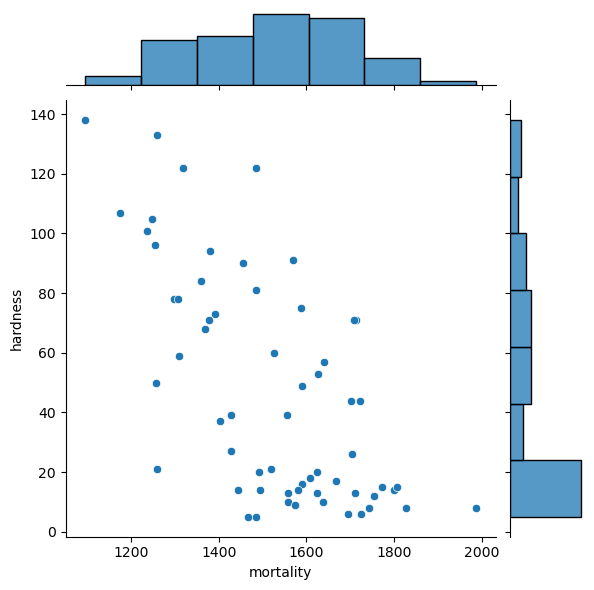

In [6]:
# Построим точечный график связи смертности и жёсткости воды
sns.jointplot(x='mortality', y='hardness', data=df)

In [7]:
# Посчитаем коэф. корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
# Посчитаем коэф. корреляции Спирмана
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [9]:
# Построим модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
x = df[['mortality']]
y = df['hardness']

In [11]:
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, random_state=108)

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = lm.predict(x_test)
y_pred

array([ 58.37476279,  44.27303089,  35.01012856, -15.03719447,
        44.41128316,  23.12043303,  85.88696523,  41.0932286 ,
        78.97435155,  65.84038556,  21.32315347,  97.22365167,
        21.46140575,  67.2229083 ,  78.69784701,  87.26948797])

In [18]:
y_test

39     90
5      10
55     20
45      8
51     13
42     13
48     50
32     14
13     78
27     37
36      6
37    107
20     44
10     73
33     59
0     105
Name: hardness, dtype: int64

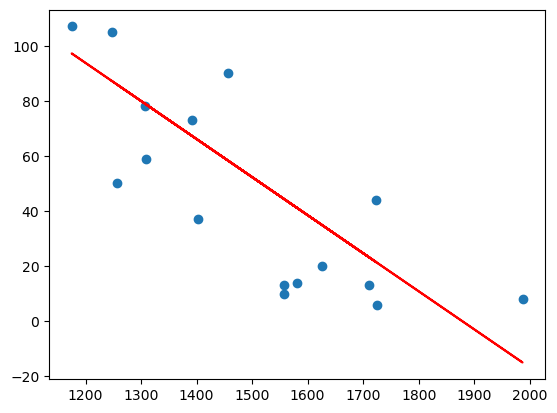

In [19]:
# Построим точечный график прогнозов
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

In [20]:
# Посчитаем коэф. детерминации
import sklearn.metrics as metrics
print(f'R2: {metrics.r2_score(y_test, y_pred)}')

R2: 0.563916513110186


<Axes: xlabel='hardness', ylabel='Count'>

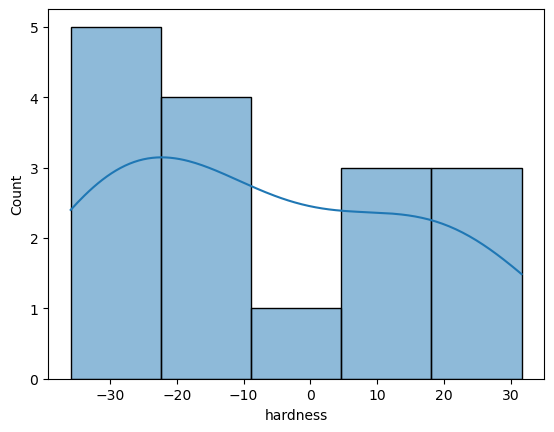

In [21]:
# Выведем график остатков
sns.histplot((y_test - y_pred), kde=True)

#### Вывод:

Исходя из графика взаимосвязи, полученных значений коэффициентов корреляции Пирсона и Спирмена, можно сделать вывод, что между средней годовой смертностью и жёсткостью воды существует умеренная отрицательная корреляция. Рассчитанное значение коэффициента детерминации также указывает на присутствие связи между двумя исследуемыми величинами.

### Задание 2.
**Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?**

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

#### Произведём необходимые расчёты отдельно для южных городов:

In [22]:
df_south = df[ df['location']=='South']

In [23]:
df_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


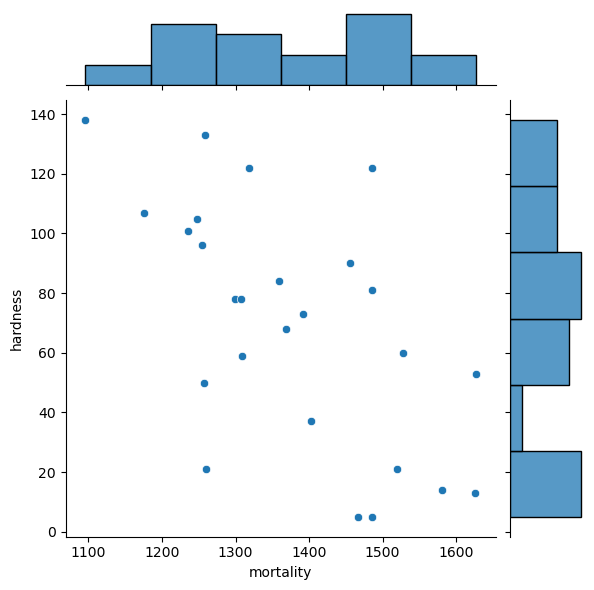

In [24]:
sns.jointplot(x='mortality', y='hardness', data=df_south)

In [25]:
# Посчитаем коэф. корреляции Пирсона
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [26]:
# Посчитаем коэф. корреляции Спирмана
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [27]:
x_1 = df_south[['mortality']]
y_1 = df_south['hardness']

In [28]:
x_1_train, x_1_test, y_1_train, y_1_test = \
    train_test_split(x_1, y_1, random_state=108)

In [29]:
lm_1 = LinearRegression()

In [30]:
lm_1.fit(x_1_train, y_1_train)

LinearRegression()

In [31]:
y_1_pred = lm_1.predict(x_1_test)
y_1_pred

array([ 78.1046302 ,  26.8783969 ,  44.56563054, 101.96570955,
        79.60637645,  50.23889417,  43.23074499])

In [32]:
y_1_test

18    122
54     13
12     21
37    107
33     59
59     81
56     60
Name: hardness, dtype: int64

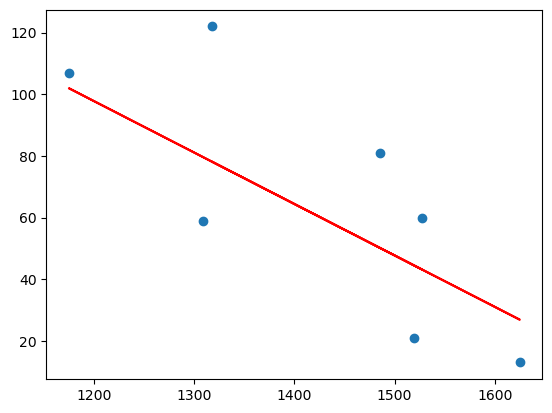

In [33]:
# Построим точечный график прогнозов
plt.scatter(x_1_test, y_1_test)
plt.plot(x_1_test, y_1_pred, c='r')

In [34]:
# Посчитаем коэф. детерминации
print(f'R2: {metrics.r2_score(y_1_test, y_1_pred)}')

R2: 0.5630724698105609


<Axes: xlabel='hardness', ylabel='Count'>

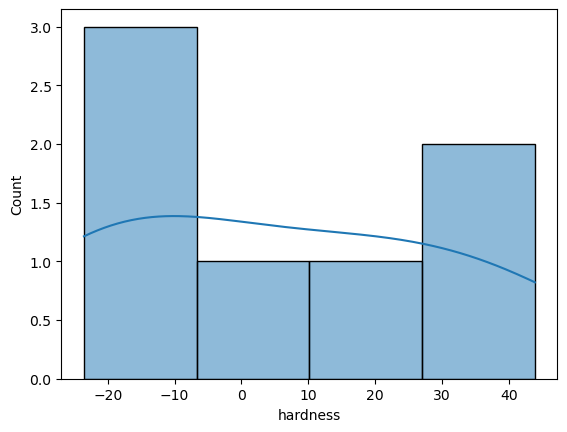

In [35]:
sns.histplot((y_1_test - y_1_pred), kde=True)

#### Произведём аналогичные расчёты отдельно для северных городов:

In [36]:
df_north = df[ df['location']=='North']

In [37]:
df_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


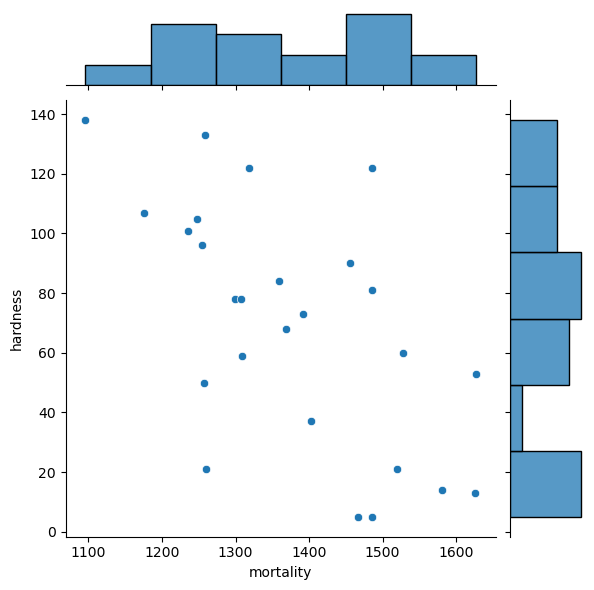

In [38]:
sns.jointplot(x='mortality', y='hardness', data=df_south)

In [39]:
# Посчитаем коэф. корреляции Пирсона
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [40]:
# Посчитаем коэф. корреляции Спирмана
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [41]:
x_2 = df_north[['mortality']]
y_2 = df_north['hardness']

In [42]:
x_2_train, x_2_test, y_2_train, y_2_test = \
    train_test_split(x_2, y_2, random_state=108)

In [43]:
lm_2 = LinearRegression()

In [44]:
lm_2.fit(x_2_train, y_2_train)

LinearRegression()

In [45]:
y_2_pred = lm_2.predict(x_2_test)
y_2_pred

array([45.65744547, 31.68279663, 26.2667844 , 32.55203316, 23.99339655,
       28.3395792 , 28.13898616, 22.58924523, 33.62186274])

In [46]:
y_2_test

60    71
49    75
1     17
23     9
31    44
8     10
52    57
20    44
5     10
Name: hardness, dtype: int64

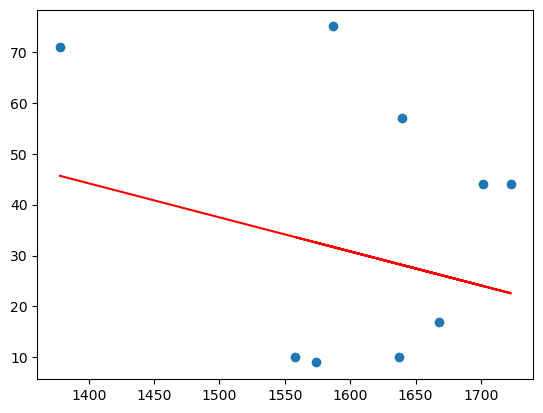

In [47]:
# Построим точечный график прогнозов
plt.scatter(x_2_test, y_2_test)
plt.plot(x_2_test, y_2_pred, c='r')

In [48]:
# Посчитаем коэф. детерминации
print(f'R2: {metrics.r2_score(y_2_test, y_2_pred)}')

R2: -0.0012111418129021612


<Axes: xlabel='hardness', ylabel='Count'>

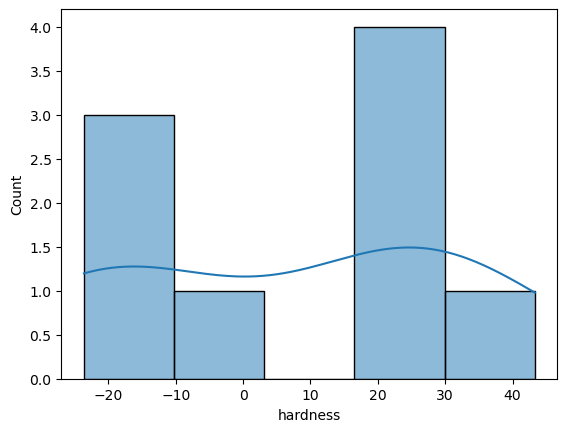

In [49]:
sns.histplot((y_2_test - y_2_pred), kde=True)

#### Вывод:

После разделения исходных данных на две группы и проведения необходимых расчётов, можно заметить, что зависимость между средней смертностью и жёсткостью воды оказалась аналогичной основным данным только для южных городов. В северных же городах исследуемые величины оказались независимыми с слабой отрицательной корреляцией.